# 케라스 신경망 모델 구성법

**감사말**

프랑소와 숄레의 [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff) 7장에 사용된 코드에 대한 설명을 담고 있으며 텐서플로우 2.6 버전 이상에서 작성되었습니다. 소스코드를 공개한 저자에게 감사드립니다.

**구글 코랩 설정**

'런타임 -> 런타임 유형 변경' 메뉴에서 GPU를 지정한다.
TensorFlow 버전을 확인하려면 아래 명령문을 실행한다.

In [2]:
import tensorflow as tf
tf.__version__

'2.17.0'

TensorFlow가 GPU를 사용하는지 여부를 확인하려면 아래 명령문을 실행한다.
아래와 같은 결과가 나오면 GPU가 제대로 지원됨을 의미한다.

```
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
```

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

**참고**

아래 코드에 대한 자세한 설명은
[머신러닝 모델 고급 활용법](https://codingalzi.github.io/dlp2/working_with_keras.html)를 
참고한다.

## 신경망 모델 구성법 1: `Sequential` 모델 활용

**`Sequential` 클래스**

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**`summary()` 메서드**

정의된 모델 구성을 요약해서 보여준다.

- 모델과 층의 이름
- 층별 파라미터 수
- 층별 파라미터 수
- 모델 전체 파라미터 수
    - 학습(trainable) 파라미터 수
    - 비학습(non-trainable) 파라미터 수

그런데 위 모델의 요약이 정보를 제대로 전달하지 못한다.

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

이유는 모델의 입력값의 모양을 모르기 때문이다.
사실 위 모델은 임의의 모양의 2차원 텐서를 입력값으로 사용할 수 있다.

**`Input()` 함수**

`Input()`함수를 이용하여 모델 훈련에 사용될 입력값에 대한 정보를 모델에 미리 전달할 수 있다. 
예를 들어 아래 코드는 훈련셋의 샘플이 784 개의 특성을 갖는 1차원 어레이로 지정한다.
즉, 이렇게 입력값의 정보를 미리 지정하면 지정된 모양의 훈련셋만 사용할 수 있다.

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    keras.Input(shape=(784,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

그러면 모델 정보가 보다 구체적으로 요약된다.

In [9]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

## 신경망 모델 구성법 2: 함수형 API

**기본 활용법**

앞서 살펴 본 `Sequential` 모델을 함수형 API를 이용하여 구성하면 다음과 같다.

In [10]:
inputs = keras.Input(shape=(784,), name="my_input")        # 입력층
features = layers.Dense(64, activation="relu")(inputs)     # 은닉층
outputs = layers.Dense(10, activation="softmax")(features) # 출력층

model = keras.Model(inputs=inputs, outputs=outputs)

In [11]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_input (InputLayer)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

### 다중 입력, 다중 출력 모델

**예제: 고객 요구사항 접수 모델**

고객의 요구사항이 입력되었을 때 처리 우선순위와 담당부서를 지정하는 시스템을 구현하려 한다. 고객의 요구사항은 세 종류의 입력값으로 구성된다. 따라서 시스템에 사용될 딥러닝 신경망 모델은 세 개의 입력값과 두 개의 출력값을 사용한다.

In [12]:
vocabulary_size = 10000    # 사용빈도 1만등 인내 단어 사용
num_tags = 100             # 태그 수
num_departments = 4        # 부서 수

# 입력층: 세 개
title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

# 은닉층
features = layers.Concatenate()([title, text_body, tags]) # shape=(None, 10000+10000+100)
features = layers.Dense(64, activation="relu")(features)

# 출력층: 두 개
priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

# 모델 빌드: 입력값으로 구성된 입력값 리스트와 출력값으로 구성된 출력값 리스트 사용
model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

은닉층으로 사용된 `Concatenate()` 층은 여러 개의 텐서를 좌우로 이어붙이는 기능을 수행한다.
따라서 여기서는 고객의 요구사항을 담고 있는
길이가 각각 1만, 1만, 100인 세 개의 벡터를 이어붙여서 길이가 총 2만1백인 하나의 벡터로 변환한다.

**모델 컴파일**

모델 컴파일 과정에서 지정된 타깃 수만큼 손실함수와 측정 기준을 지정해야 한다.

In [13]:
model.compile(optimizer="adam",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error", "mean_squared_error"], ["accuracy", "AUC", "Precision"]])

**모델 훈련**

모델 훈련을 위해 적절한 개수의 입력 텐서와 타깃 텐서를 지정해야 한다.
여기서는 훈련 과정을 설명하기 위해 
적절한 모양의 입력 텐서 3개와 타깃 텐서 2개를 무작위로 생성해서 사용한다.

In [14]:
import numpy as np

# 샘플 수
num_samples = 1280

# 입력 텐서 3 개 무작위 생성
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))    # 멀티-핫-인코딩

# 타깃 텐서 2 개 무작위 생성
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))  # 멀티-핫-인코딩

`fit()` 함수에 세 개의 훈련 텐서로 이루어진 리스트와 
두 개의 타깃 텐서로 이루어진 리스트를 지정한 후에 실행한다. 

In [15]:
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=10)

Epoch 1/10


I0000 00:00:1730787337.501587    1245 service.cc:146] XLA service 0x55a32da13410 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730787337.501638    1245 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - department_AUC: 0.4818 - department_Precision: 0.4628 - department_accuracy: 0.2102 - loss: 13.5357 - priority_mean_absolute_error: 0.3484 - priority_mean_squared_error: 0.1822
Epoch 2/10


I0000 00:00:1730787338.788674    1245 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - department_AUC: 0.5418 - department_Precision: 0.6071 - department_accuracy: 0.2262 - loss: 4.5776 - priority_mean_absolute_error: 0.2928 - priority_mean_squared_error: 0.1308
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - department_AUC: 0.5528 - department_Precision: 0.5723 - department_accuracy: 0.2700 - loss: 4.6712 - priority_mean_absolute_error: 0.3710 - priority_mean_squared_error: 0.2084 
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - department_AUC: 0.5082 - department_Precision: 0.5025 - department_accuracy: 0.2324 - loss: 11.2656 - priority_mean_absolute_error: 0.4949 - priority_mean_squared_error: 0.3257
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - department_AUC: 0.5228 - department_Precision: 0.5287 - department_accuracy: 0.3017 - loss: 14.2602 - priority_mean_absolute_error: 0.4776 - priority_mean_squared_error: 0.3134
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - department_AUC: 0.5010 - department_Precisio

**모델 평가**

모델 평가도 훈련과 동일한 방식의 인자가 사용된다.

In [16]:
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - department_AUC: 0.5101 - department_Precision: 0.5163 - department_accuracy: 0.5783 - loss: 54.3113 - priority_mean_absolute_error: 0.5197 - priority_mean_squared_error: 0.3516 


[54.8830680847168,
 0.508984386920929,
 0.5171874761581421,
 0.571093738079071,
 0.5172406435012817,
 0.3518771529197693]

**모델 활용**

예측값은 두 개의 어레이로 구성된 리스트이다.

In [17]:
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


처리 우선순위는 모두 1로 계산되었다.

In [18]:
priority_preds

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

요구사항을 처리해야 하는 부서별 확률값은 다음과 같다.

In [19]:
department_preds

array([[1.0000000e+00, 5.0770291e-28, 4.8780390e-08, 1.4980437e-14],
       [1.0000000e+00, 8.9238867e-31, 4.3726455e-08, 1.0175944e-14],
       [1.0000000e+00, 1.6067065e-29, 5.4092455e-09, 2.2488301e-14],
       ...,
       [1.0000000e+00, 1.8711068e-29, 2.2684986e-08, 5.9480673e-14],
       [1.0000000e+00, 4.0235123e-29, 1.5713432e-08, 9.7684718e-14],
       [1.0000000e+00, 2.8694353e-30, 7.1231565e-10, 6.3928655e-15]],
      dtype=float32)

각각의 요구사항을 처리해야 하는 부서는 `argmax()` 메서드로 확인된다.

In [20]:
department_preds.argmax(axis=1)

array([0, 0, 0, ..., 0, 0, 0])

### 신경망 모델 구조 그래프 

주의사항: 아래 두 코드가 실행되어 층 연결구조를 그래프로 제대로 보여주도록 하려면
먼저 `pydot` 파이썬 라이브러리와 graphviz 프로그램을 설치해야 한다.
단, 구글 코랩에서는 이미 설치되어 있다.

- `pydot` 라이브러리 설치: `pip install pydot`
- `graphviz` 프로그램 설치 : [https://graphviz.gitlab.io/download/](https://graphviz.gitlab.io/download/) 참고

`plot_model()`을 이용하여 층 연결 구조를 그래프로 나타낼 수 있다.

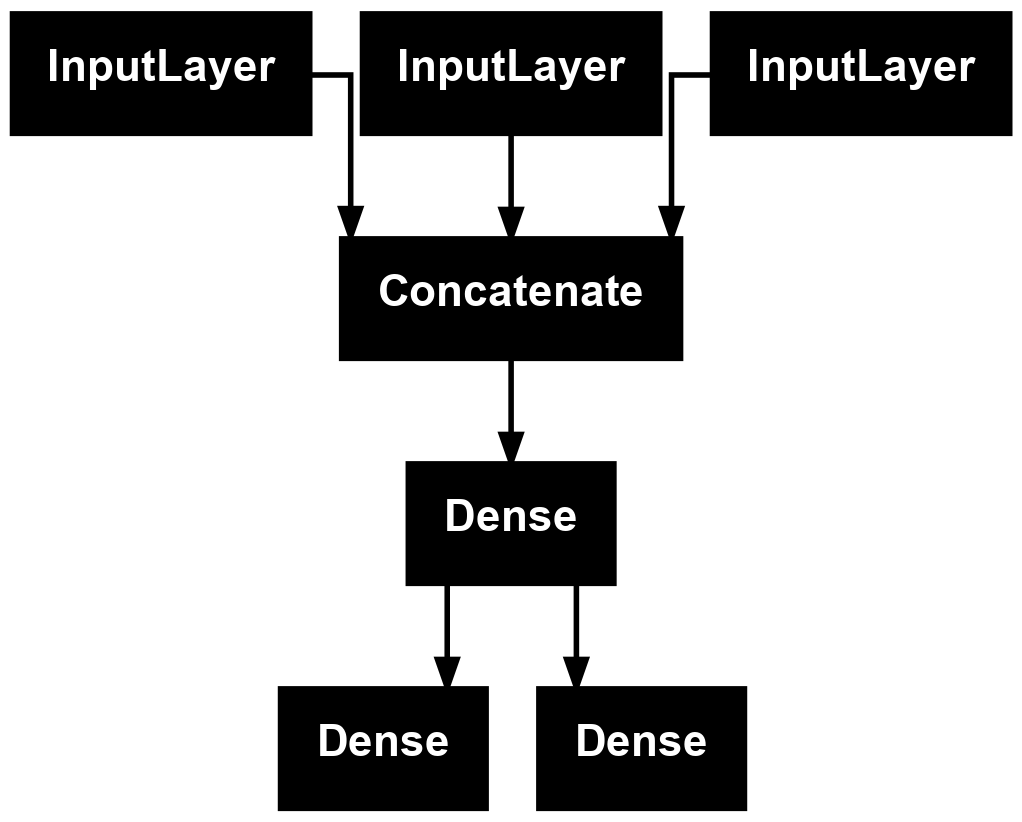

In [21]:
keras.utils.plot_model(model, "ticket_classifier.png")

입력 텐서와 출력 텐서의 모양을 함께 표기할 수도 있다.

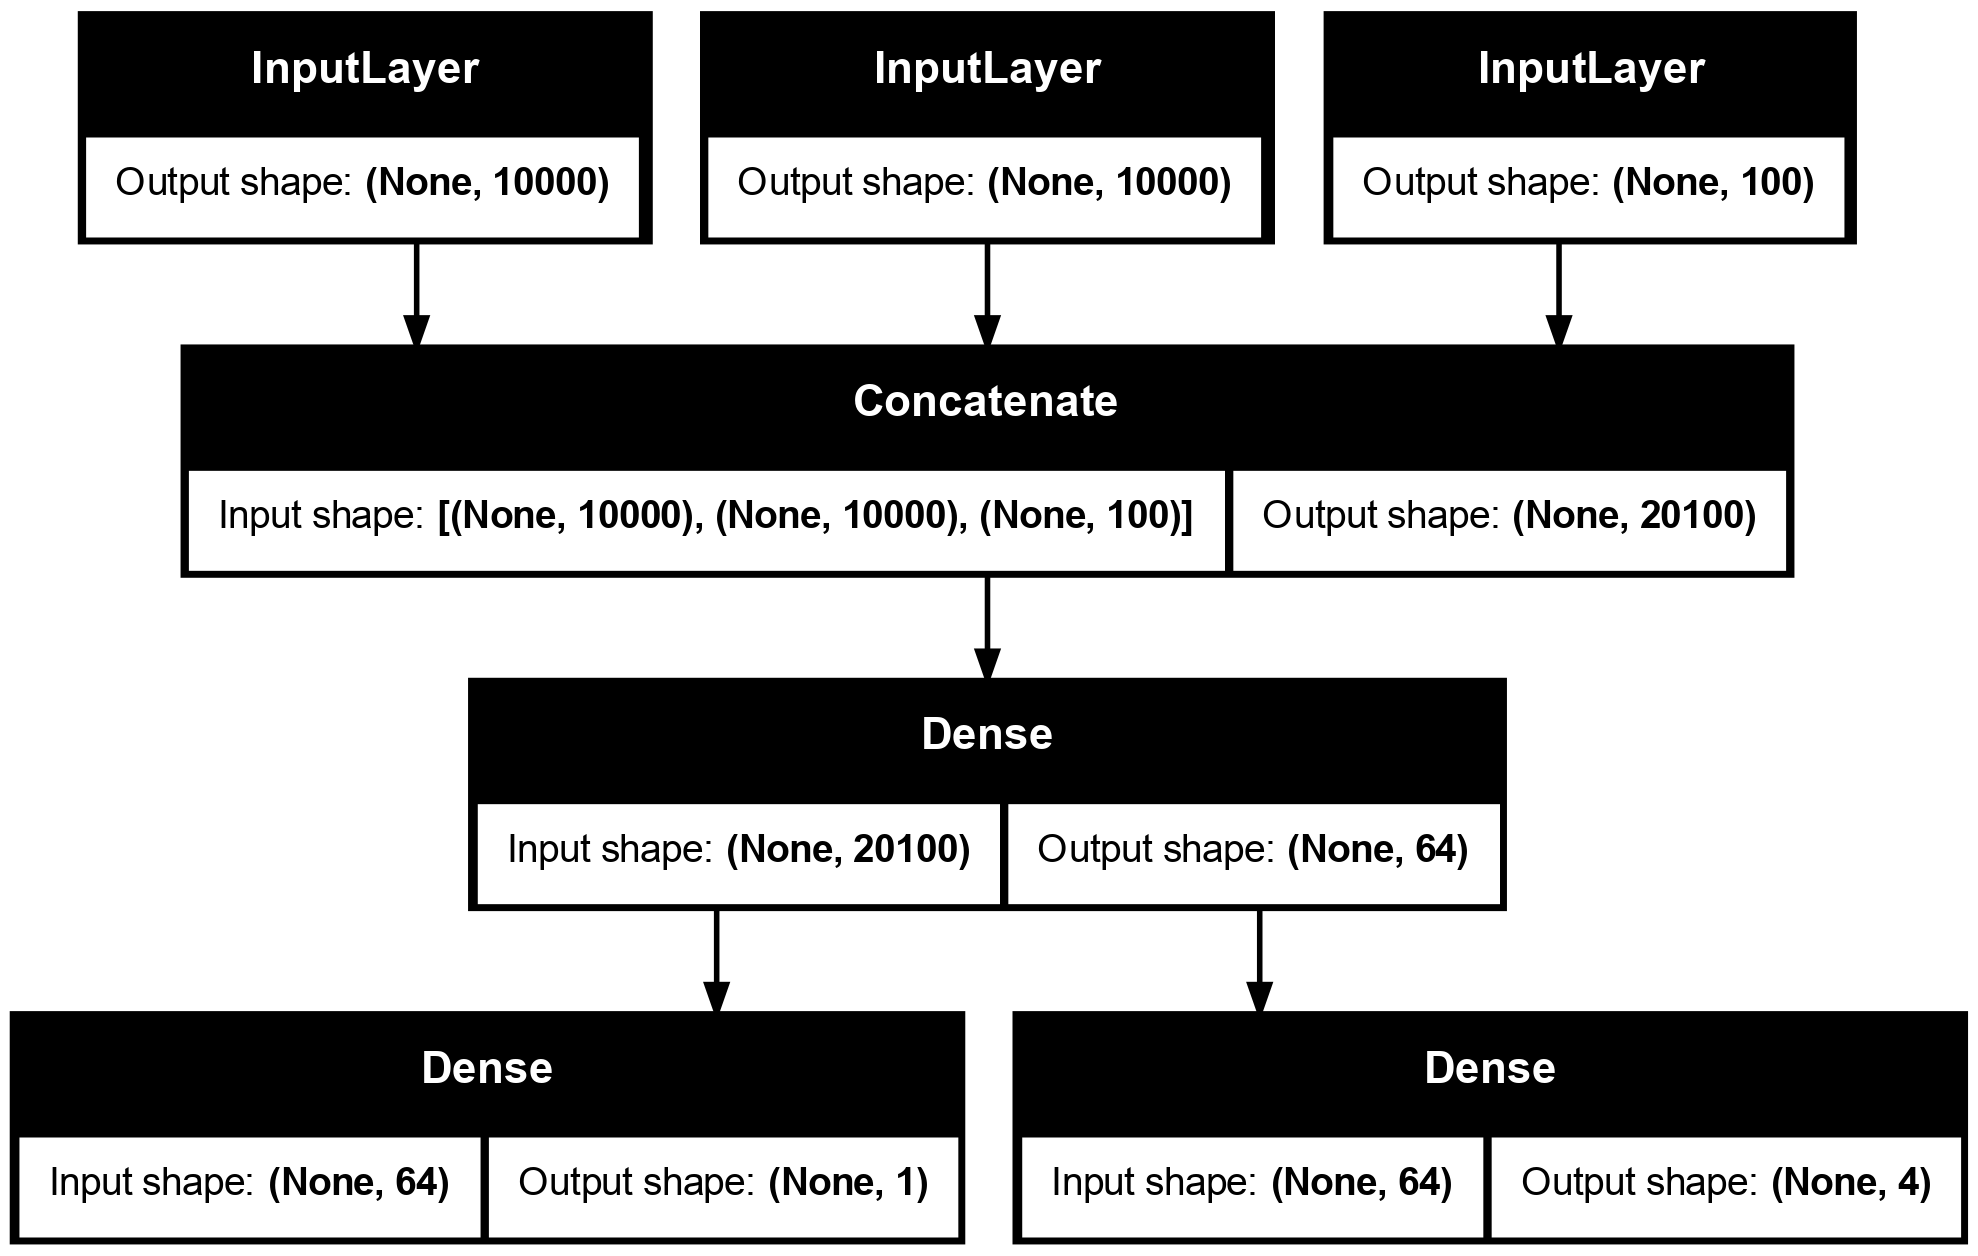

In [22]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

## 신경망 모델 구성법 3: 서브클래싱

앞서 함수형 API로 구성한 티켓 모델을 서브클래싱을 기법을 이용하여 구현하면 다음과 같다.

서브클래싱으로 모델 클래서를 선언하려면 아래 두 메서드를 목적에 맞추어 
재정의<font size='2'>overriding</font>한다.

- `__init__()` 메서드(생성자): 은닉층과 출력층으로 사용될 층 객체 지정
- `call()` 메서드: 층을 연결하는 과정 지정. 즉, 입력값으부터 출력값을 만들어내는 순전파 과정 묘사.

In [23]:
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments): # num_departments: 고객 요구사항 처리 부서 개수
        super().__init__()
        self.concat_layer = layers.Concatenate()                      # 은닉층
        self.mixing_layer = layers.Dense(64, activation="relu")       # 은닉층
        self.priority_scorer = layers.Dense(1, activation="sigmoid")  # 출력층 1
        self.department_classifier = layers.Dense(                    # 출력층 2
            num_departments, activation="softmax")

    def call(self, inputs):               # inputs: 사전 객체 입력값. 모양은 미정.
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])    # 은닉층 연결
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)                 # 출력층 연결
        department = self.department_classifier(features)
        return priority, department                               # 두 종류의 출력값 지정

모델 구성은 해당 모델의 객체를 생성하면 된다.
이전과 동일한 구성의 모델은 다음과 같이 선언한다.

In [24]:
model = CustomerTicketModel(num_departments=4)

컴파일, 훈련, 평가, 예측은 이전과 완전히 동일한 방식으로 실행된다.

In [25]:
model.compile(optimizer="adam",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error", "mean_squared_error"], ["accuracy", "AUC", "Precision"]])

In [26]:
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          [priority_data, department_data],
          epochs=10)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.5157 - Precision: 0.5026 - accuracy: 0.2440 - loss: 12.0508 - mean_absolute_error: 0.4951 - mean_squared_error: 0.3298
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6449 - Precision: 0.6513 - accuracy: 0.3166 - loss: 4.3417 - mean_absolute_error: 0.5195 - mean_squared_error: 0.3522
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7047 - Precision: 0.7664 - accuracy: 0.4220 - loss: 4.3437 - mean_absolute_error: 0.5262 - mean_squared_error: 0.3606
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.5736 - Precision: 0.5979 - accuracy: 0.2962 - loss: 12.3791 - mean_absolute_error: 0.5183 - mean_squared_error: 0.3521
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.5205 - Precision: 0.5390 - accuracy: 0.2703 - loss: 29.8065 - mean_absolute_error: 0.5265 - mean_squared_error: 0.3587
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.5825 - Precision: 0.6001 - accuracy: 0.2972 - loss: 1

In [27]:
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               [priority_data, department_data])

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.4895 - Precision: 0.4749 - accuracy: 0.0626 - loss: 50.2765 - mean_absolute_error: 0.5197 - mean_squared_error: 0.3516


[49.711814880371094,
 0.5172406435012817,
 0.3518771529197693,
 0.06484375149011612,
 0.49921873211860657,
 0.4976562559604645]

In [28]:
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


## 혼합 신경망 모델 구성법

소개된 세 가지 방식을 임의로 혼합하여 활용할 수 있다. 
무엇보다도 모델 클래스가 층의 하위 클래스이기에 
선언된/훈련된 모델을 다른 모델의 하나의 층으로 활용할 수도 있다.

**예제: 서브클래싱 모델을 함수형 모델에 활용하기** (강추!!!)

설명을 위해 먼저 서브클래싱으로 하나의 모델을 선언한다.

- 한 개의 밀집층만 사용
- 이진 분류인 경우: 하나의 유닛과 `sigmoid` 활성화 함수 사용
- 다중 클래스 분류인 경우: 클래스(범주) 수 만큼의 유닛과  `softmax` 활성화 함수 사용

In [29]:
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

아래 코드는 함수형 API 형식으로 새로운 모델을 지정한다.
이때 위 모델 클래스의 객체를 출력층으로 사용한다.

In [30]:
inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

**예제: 함수형 모델을 서브클래싱 모델에 활용하기**

설명을 위해 먼저 함수형 API 형식으로 하나의 모델을 선언한다.

In [31]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

아래 `MyModel` 클래스는 앞서 선언한 `binary_classifier` 모델을 출력층으로 활용한다.

In [32]:
class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

## 신경망 모델의 구성, 훈련, 평가, 예측

신경망 모델의 구성, 훈련, 평가, 예측은 정해진 방식으로 차례대로 이루어진다.
아래 코드는 MNIST 데이터셋을 이용한 모델 훈련 전반 과정을 보여준다.

- 데이터셋 준비

In [33]:
from tensorflow.keras.datasets import mnist

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


- 모델 선언

In [34]:
def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

- 모델 훈련

In [35]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8629 - loss: 0.4525 - val_accuracy: 0.9570 - val_loss: 0.1544
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9525 - loss: 0.1618 - val_accuracy: 0.9692 - val_loss: 0.1144
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9634 - loss: 0.1300 - val_accuracy: 0.9707 - val_loss: 0.1039
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9679 - loss: 0.1173 - val_accuracy: 0.9736 - val_loss: 0.0999
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9715 - loss: 0.1016 - val_accuracy: 0.9747 - val_loss: 0.0991
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9745 - loss: 0.0925 - val_accuracy: 0.9768 - val_loss: 0.0960
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9753 - loss: 0.0865 - val_accuracy: 0.9782 - val_loss: 0.0899
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9789 - loss: 0.0733 - 

- 모델 평가 및 활용

In [36]:
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9750 - loss: 0.1004
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


### 콜백

컴퓨터 프로그래밍에서 **콜백**<font size='2'>callback</font>은
하나의 프로그램이 실행되는 도중에 추가적으로 다른 API를 호출하는 기능 또는 해당 API를 가리킨다.
호출된 콜백은 자신을 호출한 프로그램과 독립적으로 실행된다.

신경망 모델 훈련 과정에서 사용될 수 있는 다양한 콜백 기능을 케라스가 제공한다.
일반적으로 손실값, 평가지표 등 훈련 중에 계산되는 기록을 저장하여 활용하며,
가장 많이 활용되는 콜백은 다음과 같다.

```python
keras.callbacks.ModelCheckpoint
keras.callbacks.EarlyStopping
keras.callbacks.LearningRateScheduler
keras.callbacks.ReduceLROnPlateau
keras.callbacks.CSVLogger
```

여기서는 `EarlyStopping`과 `ModelCheckpoint` 두 콜백의 기능을 살펴본다.

**`fit()` 메서드에서 `callbacks` 인자 사용하기**

아래 코드에 사용된 옵션은 다음과 같다.

- `EarlyStopping`: 검증셋에 대한 정확도가 2 에포크(epoch) 연속 개선되지 않을 때 훈련 종료
- `ModelCheckpoint`: 매 에포크마다 훈련된 모델 저장. 
    `save_best_only=True`가 설정된 경우 검증셋에 대한 손실값이 가장 낮은 모델만 저장.

In [46]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=3,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    )
]

In [47]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=50,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8635 - loss: 0.4526 - val_accuracy: 0.9594 - val_loss: 0.1473
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9526 - loss: 0.1668 - val_accuracy: 0.9671 - val_loss: 0.1173
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9616 - loss: 0.1319 - val_accuracy: 0.9718 - val_loss: 0.1117
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9674 - loss: 0.1145 - val_accuracy: 0.9736 - val_loss: 0.1019
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9709 - loss: 0.1056 - val_accuracy: 0.9750 - val_loss: 0.1051
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9745 - loss: 0.0950 - val_accuracy: 0.9750 - val_loss: 0.1033
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9768 - loss: 0.0834 - val_accuracy: 0.9780 - val_loss: 0.0891
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9776 - loss: 0.0792 - 

조기종료 후 훈련과정에서 저장된 최고 성능의 모델을 불러오면 다음과 같다.

In [39]:
model = keras.models.load_model("checkpoint_path.keras")

In [40]:
test_metrics = model.evaluate(test_images, test_labels)
test_metrics

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9745 - loss: 0.1033


[0.08732542395591736, 0.9786999821662903]

### 텐서보드

**텐서보드**(TensorBoard)는 모델 훈련과정을 모니터링하는 최고의 어플이며
텐서플로우와 함께 기본적으로 설치된다.

In [49]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(
    log_dir="./tensorboard_log_dir",
)

model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[tensorboard],
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8667 - loss: 0.4444 - val_accuracy: 0.9570 - val_loss: 0.1464
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9527 - loss: 0.1629 - val_accuracy: 0.9676 - val_loss: 0.1137
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9632 - loss: 0.1257 - val_accuracy: 0.9730 - val_loss: 0.0984
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9682 - loss: 0.1120 - val_accuracy: 0.9747 - val_loss: 0.0923
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9721 - loss: 0.0988 - val_accuracy: 0.9748 - val_loss: 0.0912
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9753 - loss: 0.0855 - val_accuracy: 0.9766 - val_loss: 0.0912
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9761 - loss: 0.0830 - val_accuracy: 0.9783 - val_loss: 0.0878
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9787 - loss: 0.0784 - 

텐서보드를 주피터 노트북에서 아래처럼 실행할 수 있다.

In [50]:
%load_ext tensorboard
%tensorboard --logdir ./tensorboard_log_dir

텐서보드를 독립적으로 실행하여 훈련과정을 실시간으로 모니터링 하려면
아래 명령문 형식으로 터미널 창에서 실행하고 반환된 주소로 접속하면 된다.

```bash
$ tensorboard --logdir ./tensorboard_log_dir
```